In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import joblib

In [2]:
import pandas as pd


df = pd.read_csv('accident1.csv')


print(df.head())
print(df.columns)


print(df.dtypes)

FileNotFoundError: [Errno 2] No such file or directory: 'accident1.csv'

In [ ]:
df.shape

(300, 8)

In [ ]:
# if there any duplicate value availabe then drop it
df.drop_duplicates(inplace=True)
#label encoder is used to convert categorical string values into numerical values.
label_encoder = LabelEncoder()

df['Number_of_Deaths'] = label_encoder.fit_transform(df['Number_of_Deaths'])  
df['Number_of_Injuries'] = label_encoder.fit_transform(df['Number_of_Injuries']) 
df['Alcohol_Involved'] = label_encoder.fit_transform(df['Alcohol_Involved'])  
df['Speed_Limit'] = label_encoder.fit_transform(df['Speed_Limit'])  

print(df.head())
print(df.dtypes)

            State  Number_of_Deaths  Number_of_Injuries Road_Type  \
0  Andhra Pradesh                 2                   3     Rural   
1       Karnataka                 1                   4     Urban   
2           Delhi                 0                   2     Urban   
3     Maharashtra                 3                   6     Rural   
4   Uttar Pradesh                 1                   2     Rural   

  Weather_Conditions  Alcohol_Involved Road_Conditions  Speed_Limit  
0              Sunny                 0            Poor            3  
1              Rainy                 1            Good            1  
2              Foggy                 0            Poor            2  
3              Sunny                 0            Good            4  
4              Sunny                 0            Fair            5  
State                 object
Number_of_Deaths       int64
Number_of_Injuries     int64
Road_Type             object
Weather_Conditions    object
Alcohol_Involved    

In [ ]:
# Handling Missing Values
# Fill missing values for numerical columns (if any) with mean

df['Number_of_Deaths'] = df['Number_of_Deaths'].fillna(df['Number_of_Deaths'].mean())
df['Number_of_Injuries'] = df['Number_of_Injuries'].fillna(df['Number_of_Injuries'].mean())
df['Speed_Limit'] = df['Speed_Limit'].fillna(df['Speed_Limit'].mean())
print(df.head())

            State  Number_of_Deaths  Number_of_Injuries Road_Type  \
0  Andhra Pradesh                 2                   3     Rural   
1       Karnataka                 1                   4     Urban   
2           Delhi                 0                   2     Urban   
3     Maharashtra                 3                   6     Rural   
4   Uttar Pradesh                 1                   2     Rural   

  Weather_Conditions  Alcohol_Involved Road_Conditions  Speed_Limit  
0              Sunny                 0            Poor            3  
1              Rainy                 1            Good            1  
2              Foggy                 0            Poor            2  
3              Sunny                 0            Good            4  
4              Sunny                 0            Fair            5  


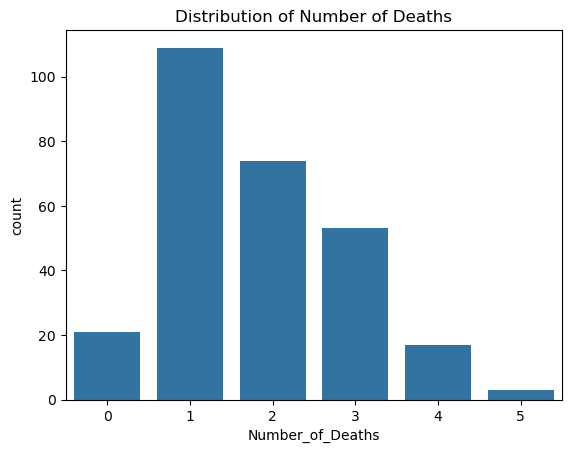

In [ ]:
#  Exploratory Data Analysis (EDA)
# Visualize the distribution of accidents by number of deaths
sns.countplot(x='Number_of_Deaths', data=df)
plt.title('Distribution of Number of Deaths')
plt.show()

In [ ]:
print(df.head())
print(df.dtypes)

            State  Number_of_Deaths  Number_of_Injuries Road_Type  \
0  Andhra Pradesh                 2                   3     Rural   
1       Karnataka                 1                   4     Urban   
2           Delhi                 0                   2     Urban   
3     Maharashtra                 3                   6     Rural   
4   Uttar Pradesh                 1                   2     Rural   

  Weather_Conditions  Alcohol_Involved Road_Conditions  Speed_Limit  
0              Sunny                 0            Poor            3  
1              Rainy                 1            Good            1  
2              Foggy                 0            Poor            2  
3              Sunny                 0            Good            4  
4              Sunny                 0            Fair            5  
State                 object
Number_of_Deaths       int64
Number_of_Injuries     int32
Road_Type             object
Weather_Conditions    object
Alcohol_Involved    

In [ ]:
categorical_cols = ['Road_Type', 'Weather_Conditions', 'Road_Conditions', 'Alcohol_Involved']
print(categorical_cols)

['Road_Type', 'Weather_Conditions', 'Road_Conditions', 'Alcohol_Involved']


In [ ]:
# Check for missing values
print(df.isnull().sum())

# Optionally fill or drop missing values
df.fillna(method='ffill', inplace=True)  


State                 0
Number_of_Deaths      0
Number_of_Injuries    0
Road_Type             0
Weather_Conditions    0
Alcohol_Involved      0
Road_Conditions       0
Speed_Limit           0
dtype: int64


C:\Users\heeta\AppData\Local\Temp\ipykernel_17384\440504914.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [ ]:

X = df[categorical_cols + ['Speed_Limit']]
y = df['Number_of_Deaths']

X_encoded = pd.get_dummies(X, drop_first=True)

# Confirm the encoding worked
print(X_encoded.head())


   Alcohol_Involved  Speed_Limit  Road_Type_Rural  Road_Type_Urban  \
0                 0            3             True            False   
1                 1            1            False             True   
2                 0            2            False             True   
3                 0            4             True            False   
4                 0            5             True            False   

   Weather_Conditions_Foggy  Weather_Conditions_No  Weather_Conditions_Rainy  \
0                     False                  False                     False   
1                     False                  False                      True   
2                      True                  False                     False   
3                     False                  False                     False   
4                     False                  False                     False   

   Weather_Conditions_Snowy  Weather_Conditions_Sunny  Road_Conditions_Fair  \
0                  

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Check the model coefficients
print("Coefficients:", model.coef_)
joblib.dump(model, "traffic_model_rf.pkl")


NameError: name 'X_train' is not defined

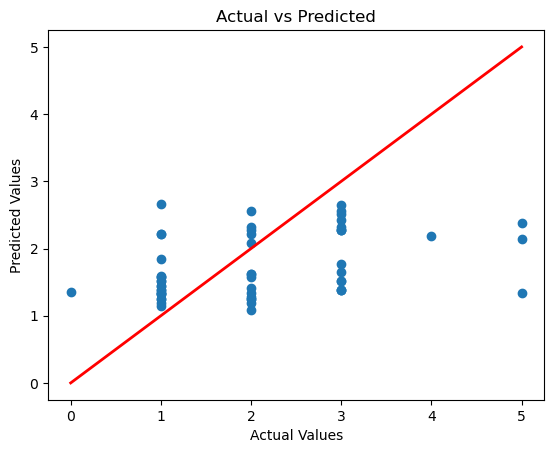

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # Line y=x
plt.show()

In [ ]:
predictions = model.predict(X_test)

# Optional: Evaluate model performance
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 1.1844540215832424
R-squared: 0.06366326904838726
Root Mean Squared Error: 1.088326247769134


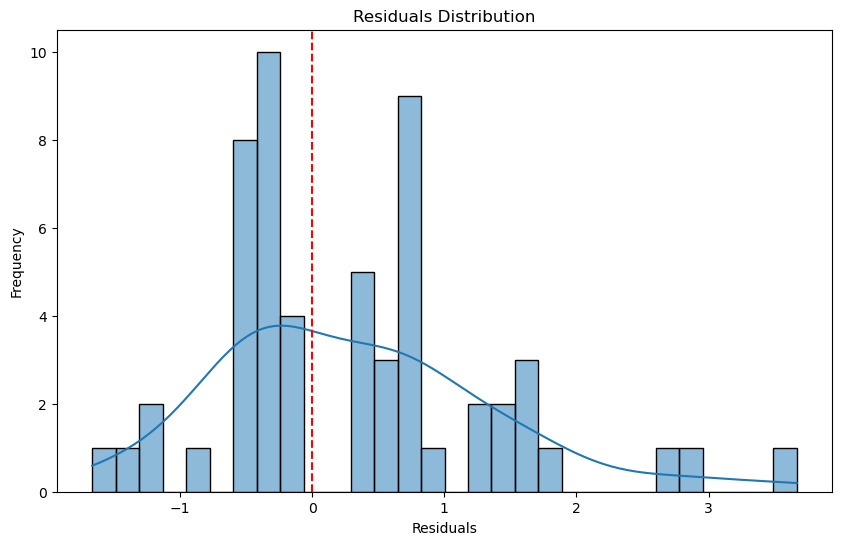

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate predictions
y_pred = model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Plot the residuals distribution
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='--')  # Add a vertical line at 0
plt.show()